In [1]:
import pandas as pd
import numpy as np
import glob
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Articles 
## Filtering, preprocessing and exploratory analysis

The cell below loads the json files into one pandas dataframe called `data`. Data has 13 columns (variables) and 11,479 rows.

In [2]:
path_to_json = 'tempdata/articles/*.json'
json_file_list = glob.glob(path_to_json)
data = pd.DataFrame()
for json in json_file_list:
    temp = pd.read_json(json)
    data = data.append(temp, ignore_index=True)
org_no_articles = len(data)

`data` has one column called fields (`data.fields`), in which a lot of information about the article is stored, including, text, author,commentable and wordcount. In order to extract this information and add it to the existing dataframe we run the code in the following cell, adding 34 new columns to the dataframe.

In [3]:
data2 = pd.json_normalize(data.fields)
data = pd.merge(data, data2, left_index=True, right_index=True)

By running the code below you can check the first 5 and last 5 rows of `data` and see it's 34 variables.

In [4]:
data

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,tags,isHosted,pillarId,pillarName,headline,standfirst,trailText,byline,main,body,wordcount,commentable,firstPublicationDate,isInappropriateForSponsorship,isPremoderated,lastModified,productionOffice,publication,shortUrl,shouldHideAdverts,showInRelatedContent,thumbnail,legallySensitive,lang,isLive,bodyText,charCount,shouldHideReaderRevenue,showAffiliateLinks,bylineHtml,commentCloseDate,displayHint,newspaperPageNumber,newspaperEditionDate,sensitive,starRating,liveBloggingNow,contributorBio
0,commentisfree/2019/dec/10/doctor-johnson-thous...,article,commentisfree,Opinion,2019-12-10T17:43:16Z,As a doctor I have to speak out: Johnson has c...,https://www.theguardian.com/commentisfree/2019...,https://content.guardianapis.com/commentisfree...,{'headline': 'As a doctor I have to speak out:...,"[{'id': 'commentisfree/commentisfree', 'type':...",False,pillar/opinion,Opinion,As a doctor I have to speak out: Johnson has c...,<p>The prime minister’s neglect of the NHS has...,The prime minister’s neglect of the NHS has re...,Andrew Meyerson,"<figure class=""element element-image"" data-med...",<p>10 December 2019</p> \n<p>Dear Boris Johnso...,816,false,2019-12-10T17:43:16Z,false,false,2020-04-15T08:43:23Z,UK,The Guardian,https://gu.com/p/cq49k,false,true,https://media.guim.co.uk/ad103fa352c436e135b04...,false,en,true,"10 December 2019 Dear Boris Johnson, In medici...",4880,false,false,"<a href=""profile/andrew-meyerson"">Andrew Meyer...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sport/2019/dec/31/sport-in-2020-calendar-your-...,article,sport,Sport,2019-12-31T20:00:44Z,Sport in 2020 calendar: your month-by-month gu...,https://www.theguardian.com/sport/2019/dec/31/...,https://content.guardianapis.com/sport/2019/de...,{'headline': 'Sport in 2020 calendar: your mon...,"[{'id': 'sport/sport', 'type': 'keyword', 'sec...",False,pillar/sport,Sport,Sport in 2020 calendar: your month-by-month gu...,"<p>The Olympics and Paralympics head to Tokyo,...","The Olympics and Paralympics head to Tokyo, Eu...",Niall McVeigh,"<figure class=""element element-image"" data-med...",<ul> \n <li><p><em>A number of sporting events...,2033,true,2019-12-31T20:00:44Z,false,false,2020-03-02T18:50:32Z,UK,theguardian.com,https://gu.com/p/czqjc,false,true,https://media.guim.co.uk/cb495b93f083d68d1ccc5...,false,en,true,A number of sporting events have been affected...,11775,false,false,"<a href=""profile/niall-mcveigh"">Niall McVeigh</a>",2020-01-03T20:00:44Z,immersive,NaN,NaN,NaN,NaN,NaN,NaN
2,world/2020/jan/09/chinas-sars-like-illness-wor...,article,world,World news,2020-01-09T19:10:17Z,China's Sars-like illness worries health experts,https://www.theguardian.com/world/2020/jan/09/...,https://content.guardianapis.com/world/2020/ja...,{'headline': 'China's Sars-like illness worrie...,"[{'id': 'world/epidemics', 'type': 'keyword', ...",False,pillar/news,News,China's Sars-like illness worries health experts,<p>China’s viral pneumonia outbreak may have j...,China’s viral pneumonia outbreak may have jump...,Sarah Boseley Health editor,"<figure class=""element element-image"" data-med...",<p>The finding that the outbreak of viral pneu...,644,NaN,2020-01-09T19:10:17Z,false,false,2020-03-18T10:59:20Z,UK,The Guardian,https://gu.com/p/d429m,false,true,https://media.guim.co.uk/aba06df90c757a621a501...,false,en,true,The finding that the outbreak of viral pneumon...,3915,false,false,"<a href=""profile/sarahboseley"">Sarah Boseley</...",NaN,NaN,6,2020-01-10T00:00:00Z,NaN,NaN,NaN,NaN
3,world/2020/jan/14/case-of-mystery-coronavirus-...,article,world,World news,2020-01-14T06:44:02Z,Case of mystery Sars-like illness found outsid...,https://www.theguardian.com/world/2020/jan/14/...,https://content.guardianapis.com/world/2020/ja...,{'headline': 'Case of mystery Sars-like illnes...,"[{'id': 'world/china', 'type': 'keyword', 'sec...",False,pillar/news,News,Case of mystery Sars-like illness found outsid...,<p>WHO working with 

All of the columns in `data` have the same dtype, namely `object`. To be able to use the data for analysis, some columns are converted to the right type. wordcount to numeric and webPublicationDate to datetime. If we find out later that other columns need to be converted to aswell we can add code to the cell below.

In [5]:
data.wordcount = pd.to_numeric(data.wordcount)
data['webPublicationDate'] = pd.to_datetime(data['webPublicationDate'])

Below are some cells that help us explore the data. The method `value_counts()` outputs a Series containing counts of unique values. Using the method on the column `productionOffice` we see that out of the 11,479 articles in `data` right now, only 7,928 are produced by the UK production office. This is something we need to remember when we start filtering later on.  

In [7]:
data.productionOffice.value_counts()

UK     9964
AUS    2481
US     1831
Name: productionOffice, dtype: int64

Using `value_counts()` on publication shows us that most of the articles in `data` have been published on the webpage whereas there are 632 articles that have been published in "The Observer", a Sunday newspaper produced by the same newsgroup as the Guardian. This is something we also need to take into account when filtering later on.

In [8]:
data.publication.value_counts()

theguardian.com    8322
The Guardian       5161
The Observer        793
Name: publication, dtype: int64

Using `value_counts()` in the next two cells tells us, first, that most articles in `data` are actual articles and not a liveblog or interactive content. The second cell tells us in what sections the articles has been published. An article can only be published in one section, and it shows us that most articles have been published in "World news", about 35% of all the articles. This is something that we can use later on when looking at the topical analysis.

In [9]:
data.type.value_counts()

article        13623
liveblog         617
interactive       36
Name: type, dtype: int64

In [10]:
data.sectionName.value_counts()

World news                                      4834
Opinion                                         1304
Business                                        1224
US news                                          812
Australia news                                   693
Sport                                            580
Politics                                         558
Football                                         534
Society                                          495
UK news                                          380
Environment                                      259
Life and style                                   229
Education                                        209
Global development                               199
Music                                            186
Media                                            167
Television & radio                               166
Money                                            165
News                                          

Below we start filtering out articles that are not relevant to our project. First of we filter out all the articles that have been produced by the UK office. Secondly, we filter out the articles that have published in 'The Observer' (This is something we could discuss, maybe leaves these in to get a broader and more representative dataset). We also remove 9 'interactive' articles since most of these don't contain any words and the rest is not useful for us. Finally, we remove the only article that has not been written in English.
<br>If you look at the output of the second cell you can see that we filtered out 4183 articles, leaving us with 7296 articles.

In [11]:
data = data[data.productionOffice=='UK']
data = data[data.publication!='The Observer']
data = data[data.type!='interactive']
data = data[data.lang=='en']

In [12]:
data = data.reset_index(drop=True)
print(f'Remaining articles: {len(data)}')
print(f'Removed articles: {org_no_articles - len(data)}')

Remaining articles: 9172
Removed articles: 5104


## Descriptive statistics of the articles

Next up, we start looking more in depth at certain variables in the dataset. First off, the `wordcount` column. We use the `describe()` method to get descriptive statistics of the variable. If you look at the output you see that the remaining 7296 articles have average of 947 words. With a maximum of 24540 words and a minimum of 3 words. Given this output, we maybe need to look at filtering out articles that have an X number words or less. Articles with only 50 words, for example, can't really contain much information. This is something we can look into.

In [13]:
data.wordcount.describe()

count     9172.000000
mean       950.235281
std       1424.909866
min          3.000000
25%        509.000000
50%        701.000000
75%        939.000000
max      26590.000000
Name: wordcount, dtype: float64

In the next cell we add two new columns to `data`, `publicationDay` and `publicatonWeek`. The column `webPublicationDate` is a timestamp containing the exact minute an article was published. The two new columns round this timestamp time to respectively day and weeknumber. We have to do this to make analysis easier for ourselves.  

In [15]:
data['publicationDay'] = data.webPublicationDate.dt.date
data['publicationWeek'] = data.webPublicationDate.dt.floor('7d')

If we use the `describe()` method on the column `publicationDay`, we get the descriptive statistics. The articles in `data` were published on 124 unique days and the most (n=141) were published on the 25th of march, the day prince Charles tested positive for coronavirus.

In [16]:
print(f'First day an article was published: {data.publicationDay.min()}')
print(f'Last day an article was published: {data.publicationDay.max()}')
data.publicationDay.describe()

First day an article was published: 2019-12-10
Last day an article was published: 2020-06-14


count           9172
unique           151
top       2020-03-25
freq             141
Name: publicationDay, dtype: object

The next three cells create some interesting plots which gives us a small insight in the amount articles and the size(`wordcount`) of articles per day. We see a huge rise in number of articles in the beginning of March with it's peak around the 25th of march, since then news has been slowly decreasing.

Text(0, 0.5, 'Number of articles')

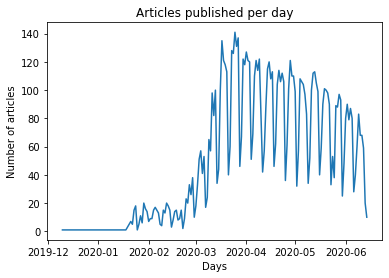

In [17]:
resp=pd.DataFrame(data.publicationDay.value_counts()) # of respondents by survey date
resp = resp.sort_index()
plt.plot(resp)
plt.title('Articles published per day')
plt.xlabel('Days')
plt.ylabel('Number of articles')

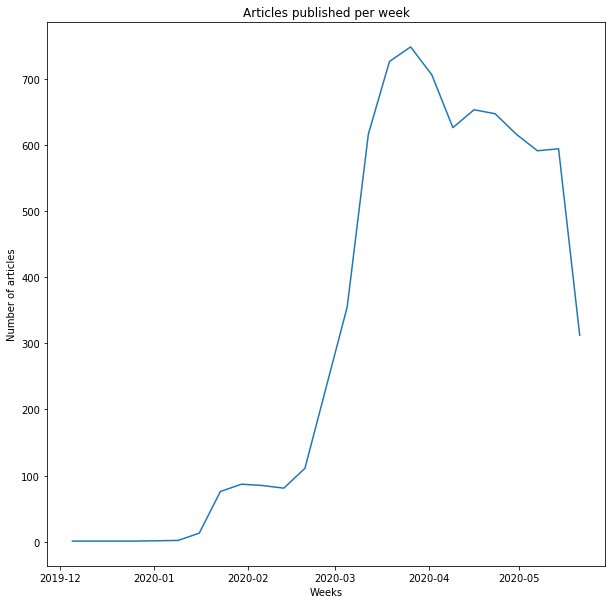

In [21]:
resp=pd.DataFrame(data.publicationWeek.value_counts()) # of respondents by survey date
resp = resp.sort_index()
plt.rcParams["figure.figsize"]=10,10
plt.plot(resp)
plt.title('Articles published per week')
plt.xlabel('Weeks')
plt.ylabel('Number of articles')
plt.savefig('graph1.png', )

Text(0, 0.5, 'wordcount')

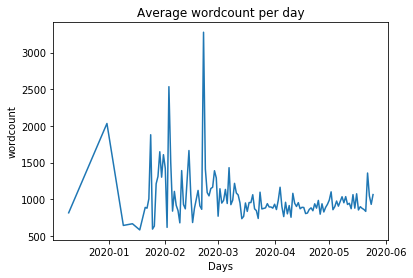

In [17]:
resp = data[['publicationDay','wordcount']].groupby(['publicationDay']).mean()
plt.plot(resp)
plt.title('Average wordcount per day')
plt.xlabel('Days')
plt.ylabel('wordcount')

# Sample for accuracy
In order to assess our search query's accuracy to get only articles related to corona, we are sampleing 100 articles which will be manually assessed if they are actually about corona. We create a random sample of 100 articles, add a column which needs to be filled in for corona relatedness, and write this sample to a csv file for further assessement. 

In [18]:
sample = data.sample(100)
sample['coronaRelated'] = 0
sample.to_csv('sample_articles.csv')

# Data to new json file
This is the end of this notebook. The last cell creates a new json file: `articles.json`. This json files contains our dataframe `data`, with all the manipulations and filtering that we did on it. So the json file contains 49 variables about 7296 articles. You need to run this entire notebook before you can run the tags notebook since the tags notebook needs the `articles.json` file in order to run. For more information about the tags have a look there!

In [20]:
data.to_json('articles.json')